# KNN Project


## The Sonar Data 

### Detecting a Rock or a Mine

Sonar (sound navigation ranging) is a technique that uses sound propagation (usually underwater, as in submarine navigation) to navigate, communicate with or detect objects on or under the surface of the water, such as other vessels.

<img src="sonar.jpg"  style="max-height: 500px; max-width: 500px;">

The data set contains the response metrics for 60 separate sonar frequencies sent out against a known mine field (and known rocks). These frequencies are then labeled with the known object they were beaming the sound at (either a rock or a mine). 

<img src="mine.jpg"  style="max-height: 500px; max-width: 500px;">

The goal is to create a machine learning model capable of detecting the difference between a rock or a mine based on the response of the 60 separate sonar frequencies.


Data Source: https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks)

### Import

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../DATA/sonar.all-data.csv')
df.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


### Data Exploration

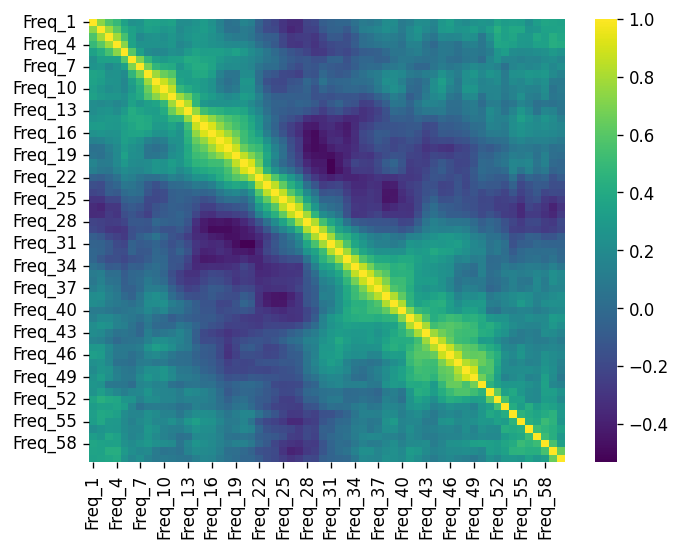

In [3]:
plt.figure(dpi=120)
sns.heatmap(df.corr(numeric_only=True), cmap='viridis');

#### Top 5 correlated features with Target

In [4]:
df['Target'] = df['Label'].map({'R':0,'M':1})

df.corr(numeric_only=True)['Target'].nlargest(6)

Target     1.000000
Freq_11    0.432855
Freq_12    0.392245
Freq_49    0.351312
Freq_10    0.341142
Freq_45    0.339406
Name: Target, dtype: float64

### Train | Test Split

In [5]:
X = df.drop(['Target', 'Label'],axis=1)
y = df['Target']

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=42)

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

scaler = StandardScaler()
KNN = KNeighborsClassifier()

operations = [('scaler', scaler), ('KNN', KNN)]

In [8]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline(operations)

In [9]:
k_lst = list(range(1,30))

parameter_grid = {'KNN__n_neighbors': k_lst}

In [10]:
from sklearn.model_selection import GridSearchCV

grid_model = GridSearchCV(pipeline, param_grid=parameter_grid, cv=5, scoring='accuracy')

In [11]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('KNN', KNeighborsClassifier())]),
             param_grid={'KNN__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')

In [12]:
grid_model.best_params_ 

{'KNN__n_neighbors': 1}

In [13]:
mean_values = grid_model.cv_results_['mean_test_score']

Text(0, 0.5, 'Accuracy')

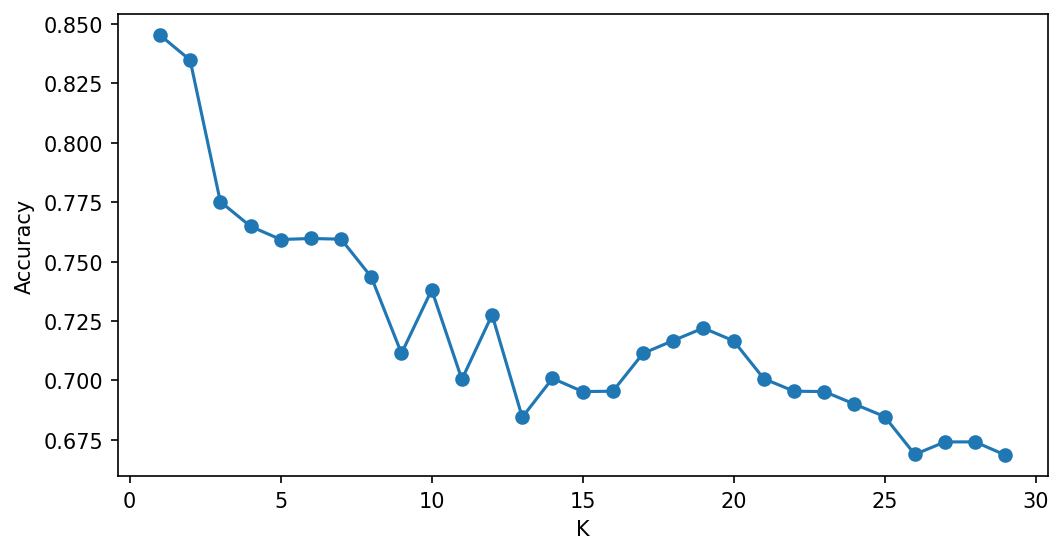

In [14]:
plt.figure(figsize=(8,4), dpi=150)
plt.plot(k_lst, mean_values, 'o-')
plt.xlabel('K')
plt.ylabel('Accuracy')

### Final Model Evaluation

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix

y_pred = grid_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.92      0.92      0.92        13

    accuracy                           0.90        21
   macro avg       0.90      0.90      0.90        21
weighted avg       0.90      0.90      0.90        21



In [16]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 7,  1],
       [ 1, 12]], dtype=int64)

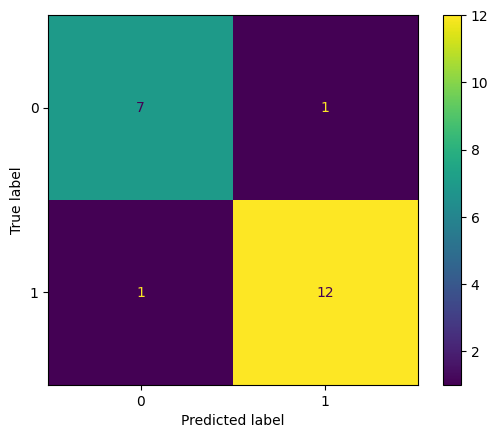

In [17]:
ConfusionMatrixDisplay(cm).plot();

---